In [1]:
import pandas as pd
import numpy as np
from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings        
warnings.filterwarnings("ignore") 
plt.style.use('ggplot') 
from scipy.stats import norm
from hmmlearn import hmm

In [2]:
df = pd.read_csv('Gia SMP va SMPcap 2021.csv')
df.head()

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1/1/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,1/2/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,1/3/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,1/4/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,1/5/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [3]:
df = df.loc[:,["Ngày","1","2","3"]]
df.head()

,Ngày,1,2,3
0,1/1/2021,964.4,964.4,964.4
1,1/2/2021,1019.7,1019.7,1019.7
2,1/3/2021,988.4,988.4,988.4
3,1/4/2021,1002.0,1002.0,1002.0
4,1/5/2021,1061.5,1061.5,1061.5


In [4]:
df.dtypes

Ngày     object
1       float64
2       float64
3       float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ngày    365 non-null    object 
 1   1       365 non-null    float64
 2   2       365 non-null    float64
 3   3       365 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.5+ KB


In [6]:
df.describe()

,1,2,3
count,365.000000,365.000000,365.000000
mean,1040.229041,1040.230685,1040.229041
std,105.146791,105.145625,105.146791
min,885.700000,885.700000,885.700000
25%,988.400000,988.400000,988.400000
50%,1022.600000,1022.600000,1022.600000
75%,1061.500000,1061.500000,1061.500000
max,1565.500000,1565.500000,1565.500000


In [7]:
df.isna().mean()

Ngày    0.0
1       0.0
2       0.0
3       0.0
dtype: float64

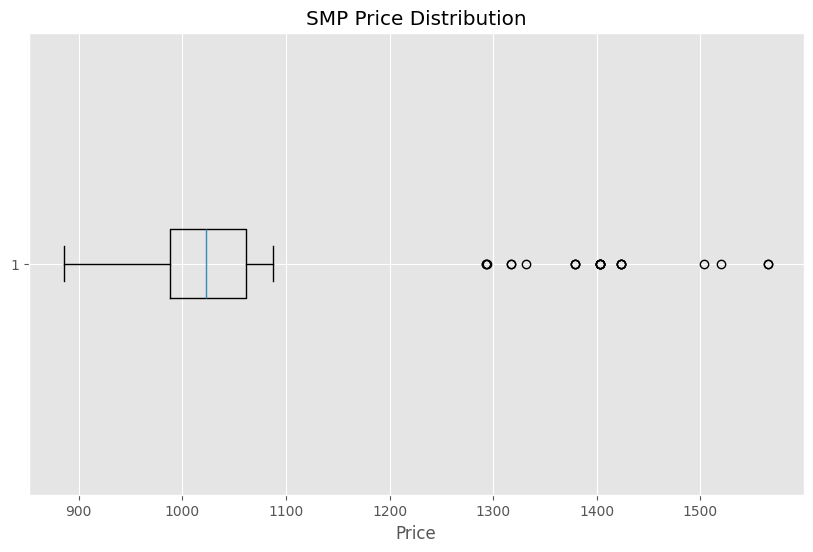

In [8]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['1'], vert=False)
plt.title(f'SMP Price Distribution')
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [9]:
IQR_Price_Day1 = df["1"].quantile(0.75) - df["1"].quantile(0.25)
lower_Day1_limit = df["1"].quantile(0.25) - (IQR_Price_Day1 * 1.5)
upper_Day1_limit = df["1"].quantile(0.75) + (IQR_Price_Day1 * 1.5)
print(lower_Day1_limit)
print(upper_Day1_limit)
df["1"]= np.where(df["1"] > upper_Day1_limit , upper_Day1_limit ,
                      np.where(df["1"] < lower_Day1_limit , lower_Day1_limit , df["1"]))

878.75
1171.15


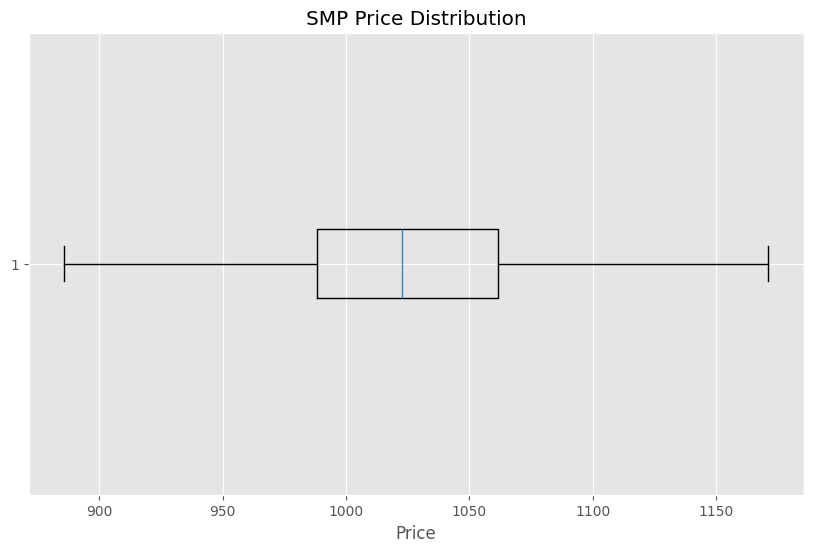

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['1'], vert=False)
plt.title(f'SMP Price Distribution')
plt.xlabel('Price')
plt.grid(True)
plt.show()

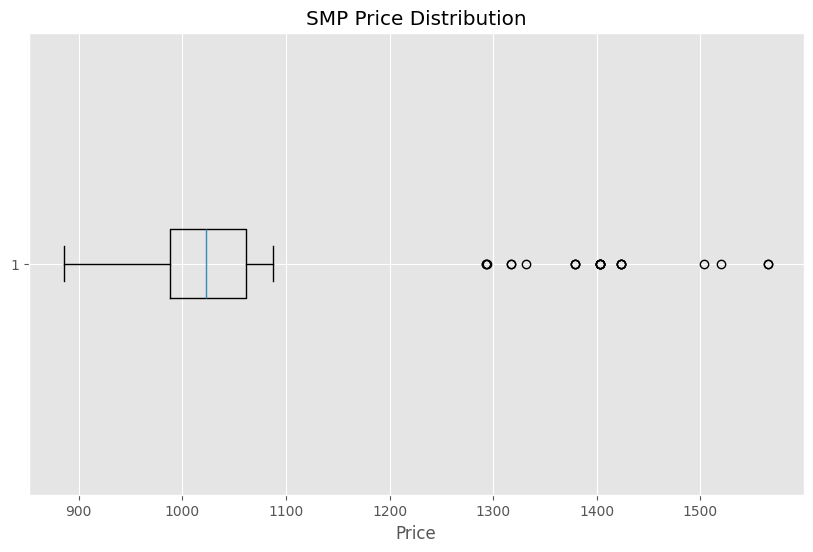

In [11]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['2'], vert=False)
plt.title(f'SMP Price Distribution')
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [12]:
IQR_Price_Day2 = df["2"].quantile(0.75) - df["2"].quantile(0.25)
lower_Day2_limit = df["2"].quantile(0.25) - (IQR_Price_Day2 * 1.5)
upper_Day2_limit = df["2"].quantile(0.75) + (IQR_Price_Day2 * 1.5)
print(lower_Day2_limit)
print(upper_Day2_limit)
df["2"]= np.where(df["2"] > upper_Day2_limit , upper_Day2_limit ,
                      np.where(df["2"] < lower_Day2_limit , lower_Day2_limit , df["2"]))

878.75
1171.15


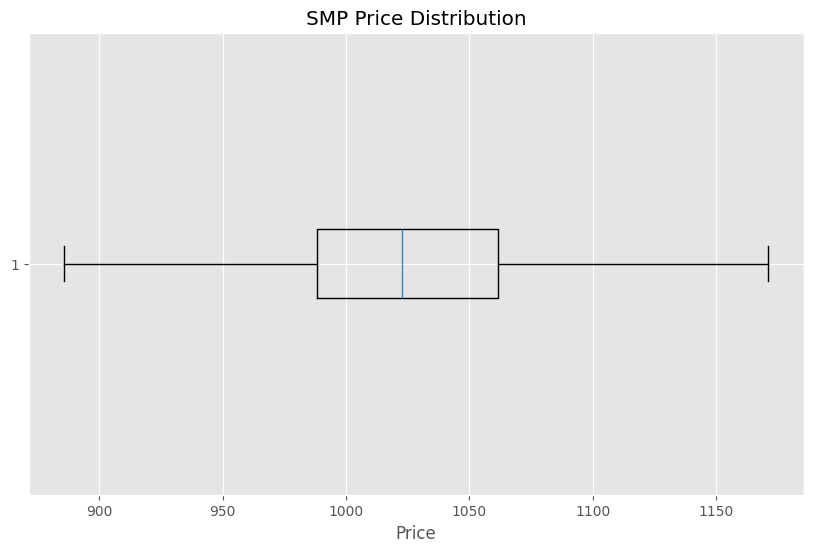

In [13]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['2'], vert=False)
plt.title(f'SMP Price Distribution')
plt.xlabel('Price')
plt.grid(True)
plt.show()

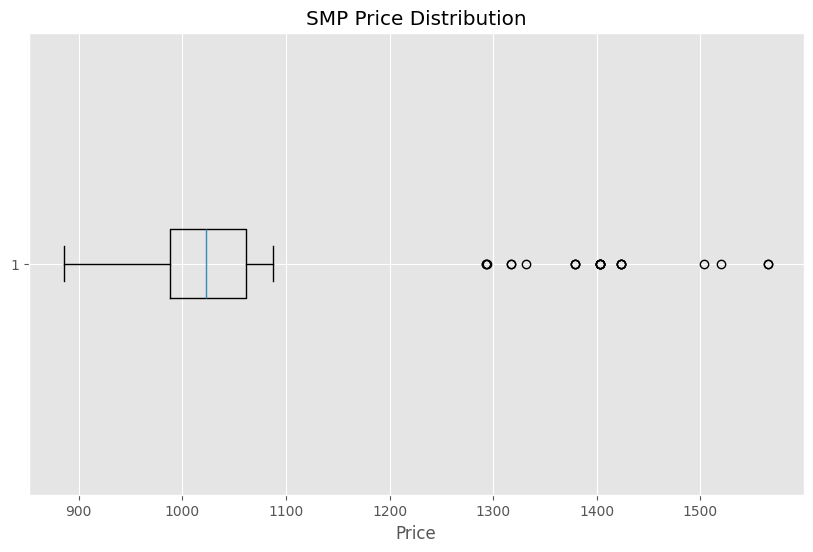

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['3'], vert=False)
plt.title(f'SMP Price Distribution')
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [15]:
IQR_Price_Day3 = df["3"].quantile(0.75) - df["3"].quantile(0.25)
lower_Day3_limit = df["3"].quantile(0.25) - (IQR_Price_Day3 * 1.5)
upper_Day3_limit = df["3"].quantile(0.75) + (IQR_Price_Day3 * 1.5)
print(lower_Day3_limit)
print(upper_Day3_limit)
df["3"]= np.where(df["3"] > upper_Day3_limit , upper_Day3_limit ,
                      np.where(df["3"] < lower_Day3_limit , lower_Day3_limit , df["3"]))

878.75
1171.15


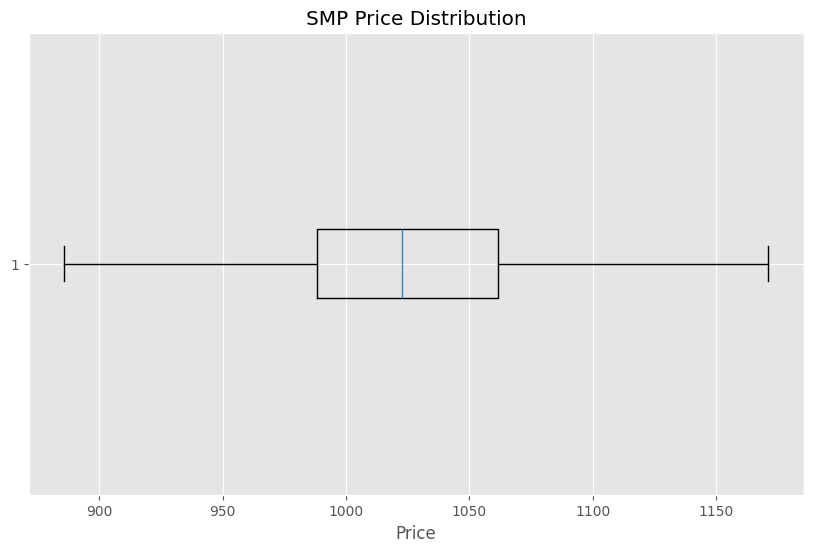

In [16]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['3'], vert=False)
plt.title(f'SMP Price Distribution')
plt.xlabel('Price')
plt.grid(True)
plt.show()

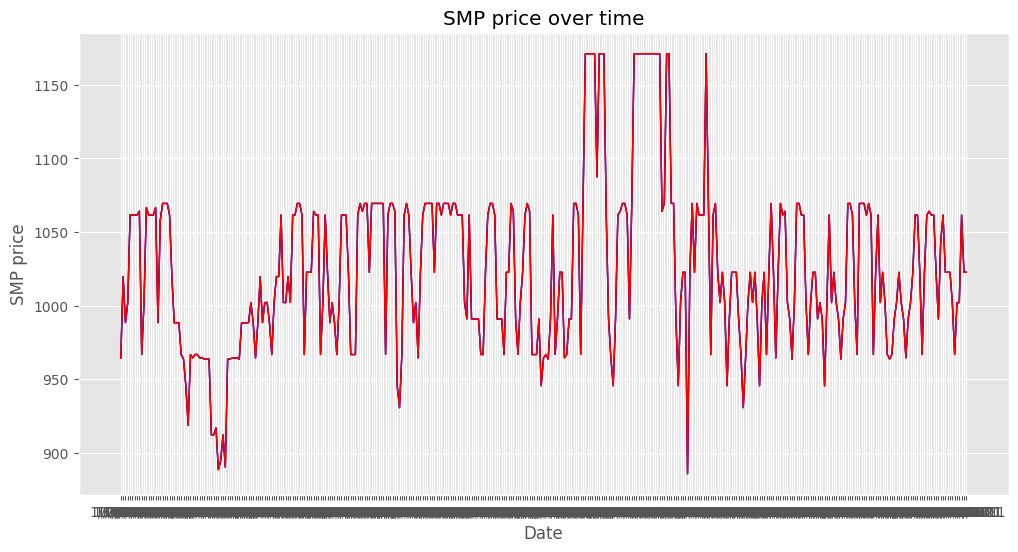

In [17]:
MyOneColumn = df['1']
MySecondColumn = df['2']
MyThirdColumn = df['3']
plt.figure(figsize=(12, 6))
plt.plot(df['Ngày'], MyOneColumn, color='blue', linewidth=1)
plt.plot(df['Ngày'], MySecondColumn, color='indigo', linewidth=1)
plt.plot(df['Ngày'], MyThirdColumn, color='red', linewidth=1)
plt.title('SMP price over time')
plt.xlabel('Date')
plt.ylabel('SMP price')
plt.grid(True)
plt.show()

In [18]:
# Melt the price columns into a single series
df_melted = df.melt(id_vars=['Ngày'], value_vars=['1', '2', '3'],
                    var_name='price_instance', value_name='price')

# Sort by datetime
df_melted.sort_values(by='Ngày', inplace=True)

In [19]:
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([0., 0.])
kf.F = np.array([[1., 1.],
                 [0., 1.]])
kf.H = np.array([[1., 0.]])
kf.R = np.array([[1.]])
kf.Q = np.array([[0.001, 0.],
                 [0., 0.001]])
kf.P = np.array([[1., 0.],
                 [0., 1.]])

predicted_prices = []
for price in df_melted['price']:
    kf.predict()
    kf.update(price)
    predicted_prices.append(kf.x[0]) 
    
df_melted['predicted_price'] = predicted_prices

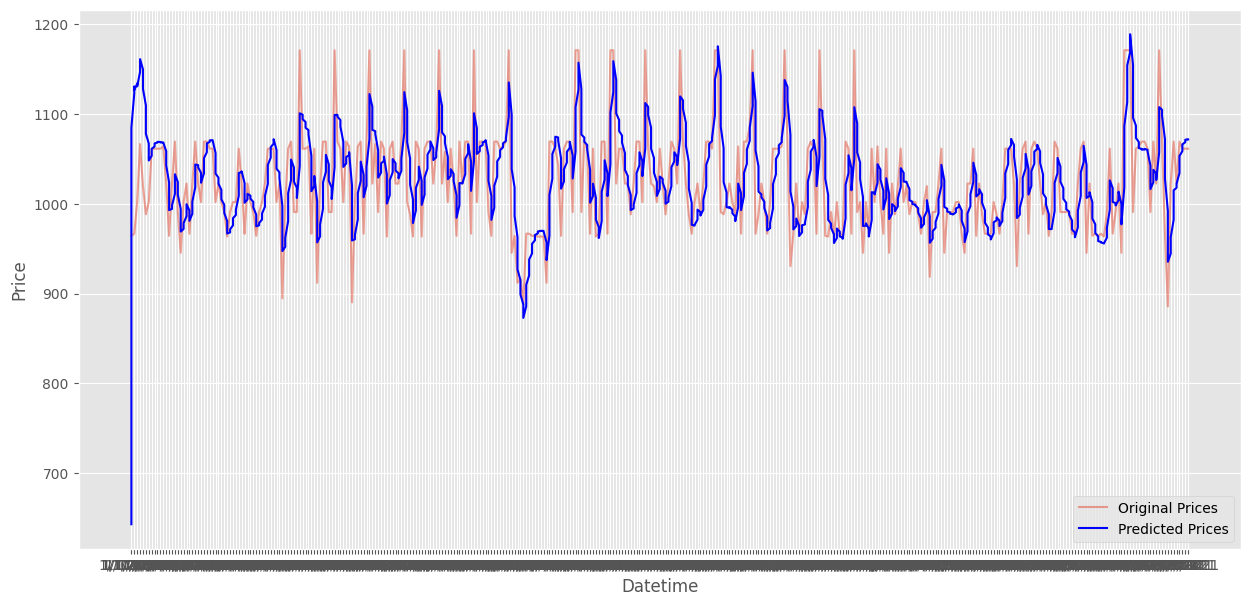

In [20]:
plt.figure(figsize=(15, 7))
plt.plot(df_melted['Ngày'], df_melted['price'], label='Original Prices', alpha=0.5)
plt.plot(df_melted['Ngày'], df_melted['predicted_price'], label='Predicted Prices', color='blue')
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.legend()
plt.show()

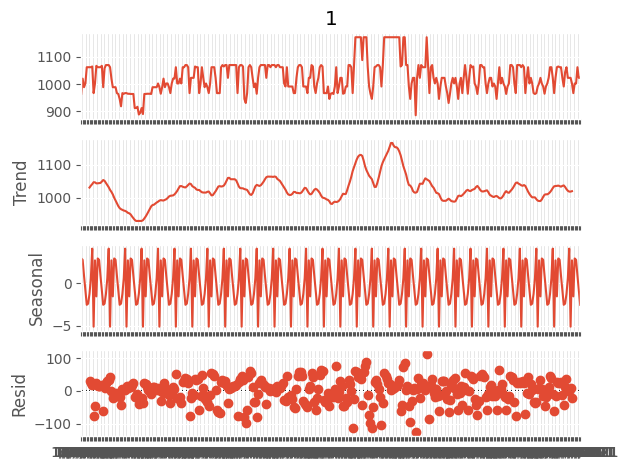

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Ngày', inplace=True)
decomposition_day1 = seasonal_decompose(df['1'], model='additive', period=12)
decomposition_day1.plot()
plt.show()

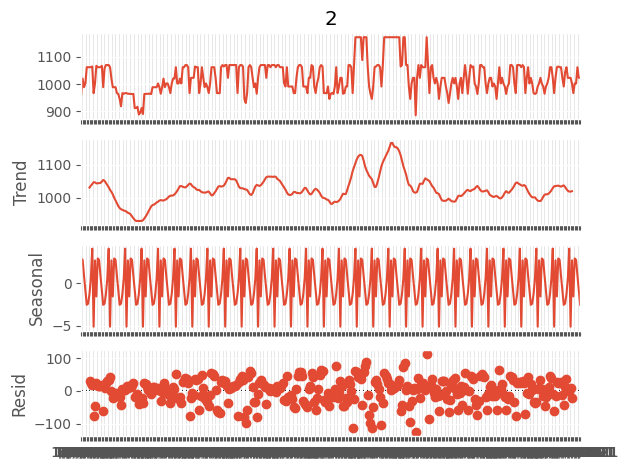

In [22]:
decomposition_day2 = seasonal_decompose(df['2'], model='additive', period=12)
decomposition_day2.plot()
plt.show()

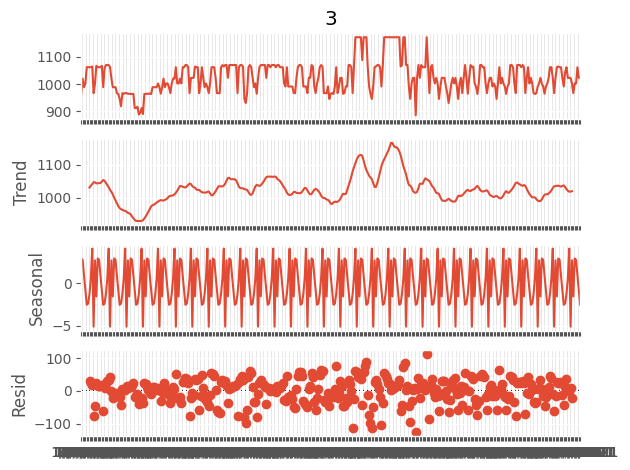

In [23]:
decomposition_day3 = seasonal_decompose(df['3'], model='additive', period=12)
decomposition_day3.plot()
plt.show()

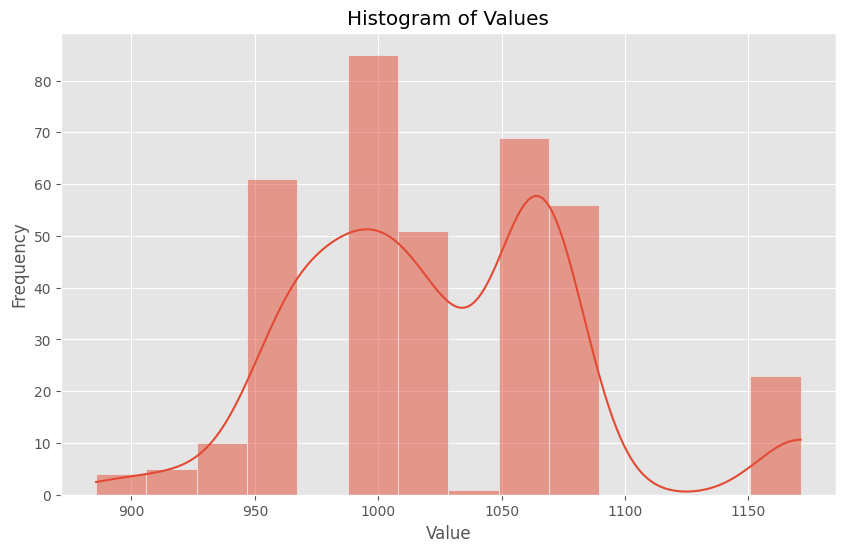

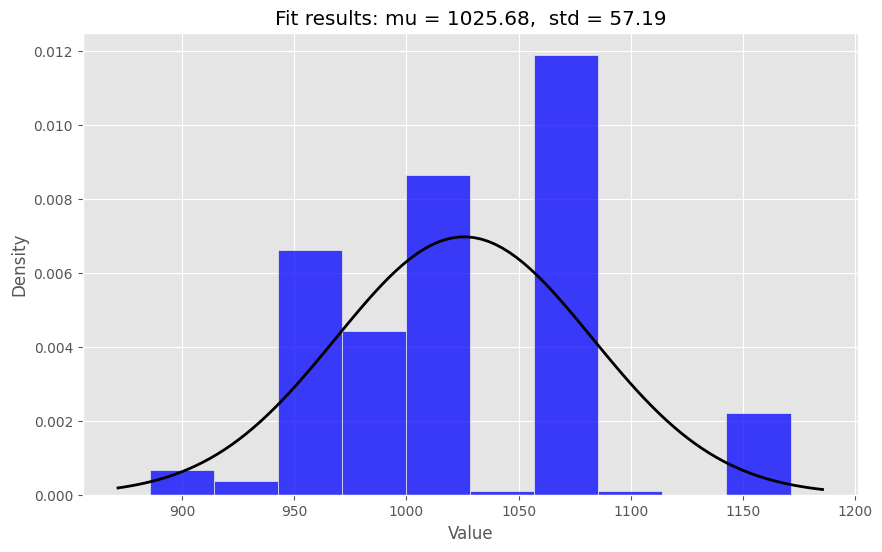

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['1'], kde=True)
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

mu, std = norm.fit(df['1'])

plt.figure(figsize=(10, 6))
sns.histplot(df['1'], bins=10, kde=False, color='blue', stat='density')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

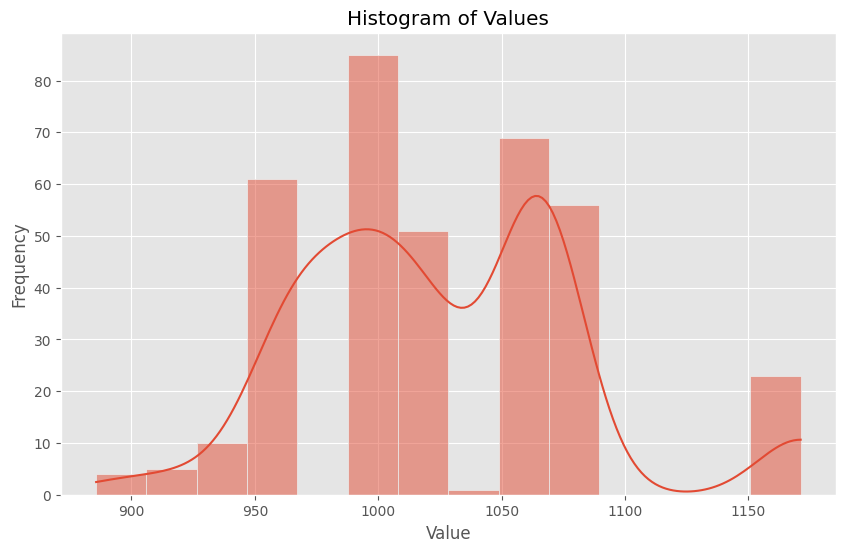

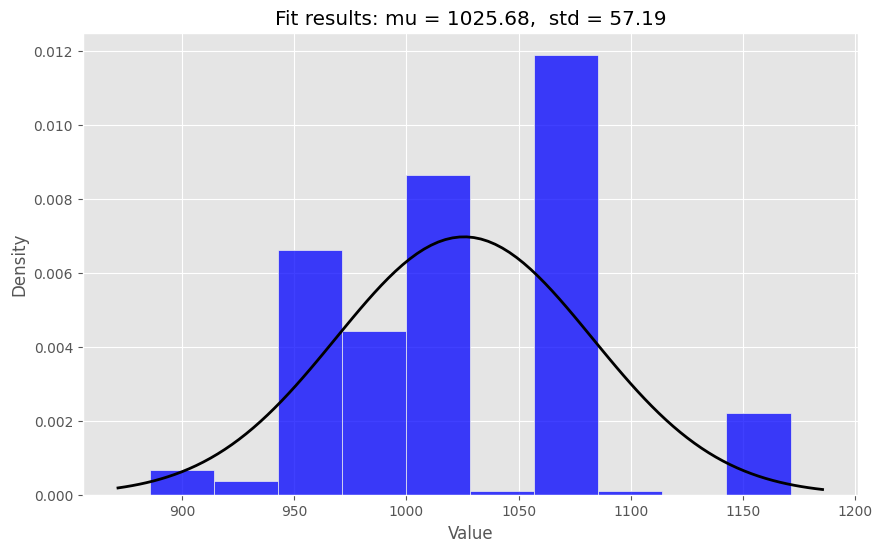

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['2'], kde=True)
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

mu, std = norm.fit(df['2'])

plt.figure(figsize=(10, 6))
sns.histplot(df['2'], bins=10, kde=False, color='blue', stat='density')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

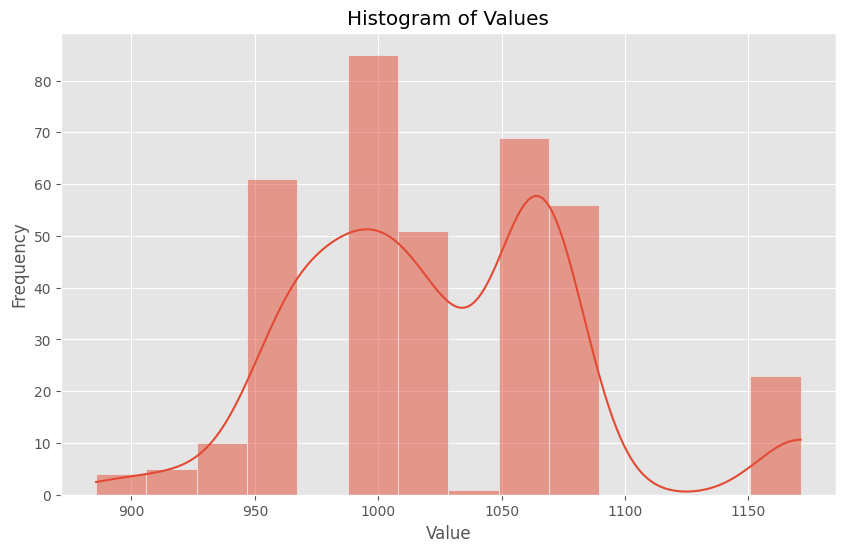

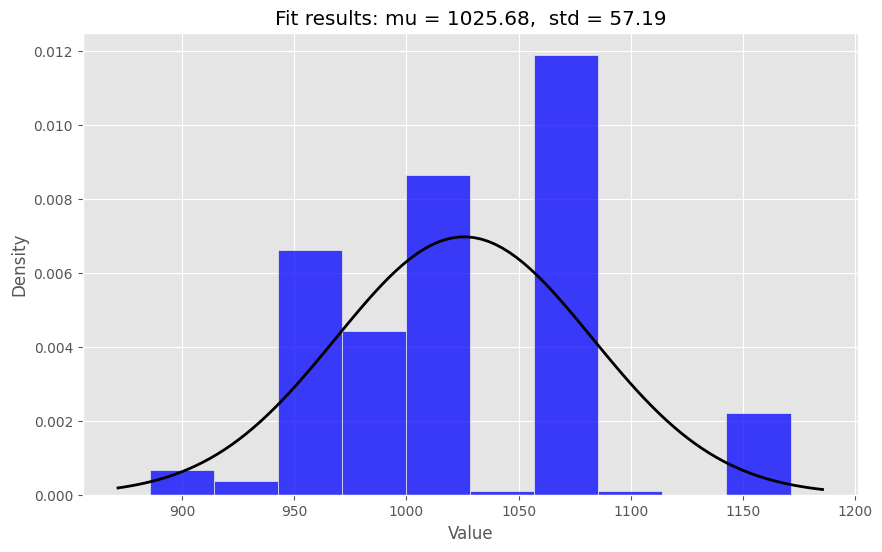

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['3'], kde=True)
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

mu, std = norm.fit(df['3'])

plt.figure(figsize=(10, 6))
sns.histplot(df['3'], bins=10, kde=False, color='blue', stat='density')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [27]:
SMP = df['1']
bins = [0, 900, 950, 1000, 1050, 1100, np.inf]
labels = ['<900', '900-950', '950-1000', '1000-1050', '1050-1100', '>1100']
states = pd.cut(SMP, bins=bins, labels=labels)
transitions = pd.crosstab(states.shift(-1), states, normalize=1)

print(transitions)

1          <900   900-950  950-1000  1000-1050  1050-1100     >1100
1                                                                  
<900       0.25  0.133333  0.000000   0.011111      0.000  0.000000
900-950    0.25  0.266667  0.074766   0.011111      0.008  0.000000
950-1000   0.25  0.400000  0.523364   0.300000      0.128  0.000000
1000-1050  0.25  0.200000  0.289720   0.400000      0.160  0.000000
1050-1100  0.00  0.000000  0.112150   0.277778      0.664  0.217391
>1100      0.00  0.000000  0.000000   0.000000      0.040  0.782609


In [28]:
current_state = states.iloc[-1]
predicted_state = np.dot(transitions.loc[current_state].values, transitions.values)
print(predicted_state)

[0.28492991 0.28255452 0.30041401 0.29636033 0.20892411 0.03478261]


In [29]:
SMP = df['1'].values.reshape(-1, 1)
SMP = (SMP - np.mean(SMP)) / np.std(SMP)
model = hmm.GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000)
model.fit(SMP)
hidden_states = model.predict(SMP)

print(hidden_states)

[3 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 3 3 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 2 2 2 2 2 1 2 2 2 1 0 0 0 0 1 1 1 1 1 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 1 0 0 0 0 0 3 0 1 0 1 1 1 1 2 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0]


In [30]:
predicted_SMP = model.sample(10)[0]
print(predicted_SMP)

[[-1.34537707]
 [-1.10452701]
 [-1.65332484]
 [-0.34570604]
 [-0.41989411]
 [ 0.64003217]
 [-0.48705153]
 [-1.06889291]
 [-0.56840391]
 [-1.47048127]]


In [31]:
SMP = df['2']
bins = [0, 900, 950, 1000, 1050, 1100, np.inf]
labels = ['<900', '900-950', '950-1000', '1000-1050', '1050-1100', '>1100']
states = pd.cut(SMP, bins=bins, labels=labels)
transitions = pd.crosstab(states.shift(-1), states, normalize=1)

print(transitions)

2          <900   900-950  950-1000  1000-1050  1050-1100     >1100
2                                                                  
<900       0.25  0.133333  0.000000   0.011111      0.000  0.000000
900-950    0.25  0.266667  0.074766   0.011111      0.008  0.000000
950-1000   0.25  0.400000  0.523364   0.300000      0.128  0.000000
1000-1050  0.25  0.200000  0.289720   0.400000      0.160  0.000000
1050-1100  0.00  0.000000  0.112150   0.277778      0.664  0.217391
>1100      0.00  0.000000  0.000000   0.000000      0.040  0.782609


In [32]:
current_state = states.iloc[-1]
predicted_state = np.dot(transitions.loc[current_state].values, transitions.values)
print(predicted_state)

[0.28492991 0.28255452 0.30041401 0.29636033 0.20892411 0.03478261]


In [33]:
SMP = df['2'].values.reshape(-1, 1)
SMP = (SMP - np.mean(SMP)) / np.std(SMP)
model = hmm.GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000)
model.fit(SMP)
hidden_states = model.predict(SMP)

print(hidden_states)

[3 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 1 1 1 1 1 2 2 2 2 1 1 1 2 2 1 2 2 2 2 2 2 1 1 1 2 2 2 2 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 3 3 2 1 1 1 2 2 2 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 1 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 1 1 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 1 1 1 2 1 0 0 0 0 0 1 0 0 0 1 2 2 2 2 1 1 1 1 1 2 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 2 2 2 2 2 3 2 1 2 1 1 1 1 0 1 2 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 2 2 2 2 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 1 2 2 1 1 1 1 1 1 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 1 1 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2]


In [34]:
predicted_SMP = model.sample(10)[0]
print(predicted_SMP)

[[-1.4947314 ]
 [-2.24594165]
 [-0.80890009]
 [-1.59224983]
 [-1.74304906]
 [-1.27871723]
 [-1.76772131]
 [-1.71142544]
 [-0.05350335]
 [-0.73619802]]


In [35]:
SMP = df['3']
bins = [0, 900, 950, 1000, 1050, 1100, np.inf]
labels = ['<900', '900-950', '950-1000', '1000-1050', '1050-1100', '>1100']
states = pd.cut(SMP, bins=bins, labels=labels)
transitions = pd.crosstab(states.shift(-1), states, normalize=1)

print(transitions)

3          <900   900-950  950-1000  1000-1050  1050-1100     >1100
3                                                                  
<900       0.25  0.133333  0.000000   0.011111      0.000  0.000000
900-950    0.25  0.266667  0.074766   0.011111      0.008  0.000000
950-1000   0.25  0.400000  0.523364   0.300000      0.128  0.000000
1000-1050  0.25  0.200000  0.289720   0.400000      0.160  0.000000
1050-1100  0.00  0.000000  0.112150   0.277778      0.664  0.217391
>1100      0.00  0.000000  0.000000   0.000000      0.040  0.782609


In [36]:
current_state = states.iloc[-1]
predicted_state = np.dot(transitions.loc[current_state].values, transitions.values)
print(predicted_state)

[0.28492991 0.28255452 0.30041401 0.29636033 0.20892411 0.03478261]


In [37]:
SMP = df['3'].values.reshape(-1, 1)
SMP = (SMP - np.mean(SMP)) / np.std(SMP)
model = hmm.GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000)
model.fit(SMP)
hidden_states = model.predict(SMP)

print(hidden_states)

[1 3 1 3 2 2 2 2 2 1 3 2 2 2 2 2 2 2 2 2 2 2 1 3 1 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 1 3 3 1 3 1 3 1 3 2 2 2 1 3 1 3
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 2 2 1 3 3 1 3 2 2 2 2 1 3 3 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 3 3 2 2 2 2 1 3 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 3 1 3 1 3 2 2 2 2 2 1 3 1 3 2 2 2 2 1 3 1 3 2 2 2 1 3 1 3 1 3 3 1
 3 2 1 3 1 3 1 3 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 3 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 2 2 2 2 2 2 2 1 3 1 3 2 2 2 2 1
 3 1 3 1 3 1 3 1 3 2 1 3 1 3 1 3 3 2 2 2 1 3 2 2 2 2 2 2 2 2 2 1 3 3 1 3 1
 3 1 3 1 3 1 3 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 3 2 2 2]


In [38]:
predicted_SMP = model.sample(10)[0]
print(predicted_SMP)

[[-0.64203531]
 [-0.70778712]
 [-0.86080151]
 [-0.07321649]
 [ 0.07915371]
 [ 1.70511649]
 [ 0.24874861]
 [ 0.96641488]
 [ 0.18424956]
 [-0.59870332]]
